# Group 2: 2015 Flight Delays and Cancellations

This file consists code snippets for the data profiling, cleaning and harmonizing of the 2015 flight delay and cancellation dataset from Kaggle which can be found here: https://www.kaggle.com/datasets/usdot/flight-delays?select=flights.csv

# Data Profiling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.cm as cm
import pandas as pd
from pandas_profiling import ProfileReport
import operator

%matplotlib inline

##### Reading the datasets: flights.csv, airlines.csv and airports.csv

In [2]:
'''setting the path'''

path = "Datasets/"

In [3]:
'''Reading the flights csv file'''

flights = pd.read_csv(path + "flights.csv")
flights.head(3)

C:\Users\aishw\AppData\Local\Temp\ipykernel_3104\1186815690.py:3: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  flights = pd.read_csv(path + "flights.csv")


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
'''Reading the airlines csv file'''

airlines = pd.read_csv(path + "airlines.csv")
airlines.head(3)

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.


In [5]:
'''Reading the airports csv file'''

airports = pd.read_csv(path + "airports.csv")
airports.head(3)

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919


##### Merging the 3 csv's together using left join on IATA code

In [6]:
flights.rename(columns={'AIRLINE': 'IATA_CODE', 'ORIGIN_AIRPORT':'ORIGIN_AIRPORT_CODE',
                        'DESTINATION_AIRPORT':'DESTINATION_AIRPORT_CODE'}, inplace=True)

origin_airports = airports.rename(columns={'IATA_CODE':'ORIGIN_AIRPORT_CODE','AIRPORT': 'ORIGIN_AIRPORT',
                                           'CITY':'ORIGIN_CITY'})
destination_airports = airports.rename(columns={'IATA_CODE':'DESTINATION_AIRPORT_CODE','AIRPORT': 'DESTINATION_AIRPORT',
                                                'CITY':'DESTINATION_CITY'})
# Merge datasets together
flights2 = pd.merge(flights, airlines,  how='left', on="IATA_CODE")
flights3 = pd.merge(flights2, origin_airports[['ORIGIN_AIRPORT_CODE','ORIGIN_AIRPORT',
 'ORIGIN_CITY']], how= 'left', left_on='ORIGIN_AIRPORT_CODE', right_on='ORIGIN_AIRPORT_CODE')
flights_df = pd.merge(flights3, destination_airports[['DESTINATION_AIRPORT_CODE','DESTINATION_AIRPORT',
 'DESTINATION_CITY']], how= 'left', left_on='DESTINATION_AIRPORT_CODE', right_on='DESTINATION_AIRPORT_CODE')

flights_df.head(3)

,YEAR,MONTH,DAY,DAY_OF_WEEK,IATA_CODE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT_CODE,DESTINATION_AIRPORT_CODE,SCHEDULED_DEPARTURE,...,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE,ORIGIN_AIRPORT,ORIGIN_CITY,DESTINATION_AIRPORT,DESTINATION_CITY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,NaN,NaN,NaN,NaN,NaN,American Airlines Inc.,Los Angeles International Airport,Los Angeles,Palm Beach International Airport,West Palm Beach
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,NaN,NaN,NaN,NaN,NaN,US Airways Inc.,San Francisco International Airport,San Francisco,Charlotte Douglas International Airport,Charlotte


# Data Cleansing

In [7]:
'''Adding date column using the year, month and day columns'''

flights_df['DATE'] = pd.to_datetime(flights_df[['YEAR','MONTH', 'DAY']])

In [8]:
'''Adding new column Quarter for data visualization purpose'''

flights_df['Quarter'] = pd.PeriodIndex(flights_df.DATE, freq='Q')

In [9]:
flights_df.drop('YEAR', axis=1, inplace=True)
flights_df.drop('MONTH', axis=1, inplace=True)
flights_df.drop('DAY', axis=1, inplace=True)
flights_df.drop('DAY_OF_WEEK', axis=1, inplace=True)

In [10]:
flights_df.drop('ORIGIN_AIRPORT_CODE', axis=1, inplace=True)
flights_df.drop('DESTINATION_AIRPORT_CODE', axis=1, inplace=True)

In [11]:
#prof = ProfileReport(flights_df, minimal=True)
#prof.to_file(output_file='output.html')

#low_memory=False

In [12]:
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5819079 entries, 0 to 5819078
Data columns (total 32 columns):
 #   Column               Dtype         
---  ------               -----         
 0   IATA_CODE            object        
 1   FLIGHT_NUMBER        int64         
 2   TAIL_NUMBER          object        
 3   SCHEDULED_DEPARTURE  int64         
 4   DEPARTURE_TIME       float64       
 5   DEPARTURE_DELAY      float64       
 6   TAXI_OUT             float64       
 7   WHEELS_OFF           float64       
 8   SCHEDULED_TIME       float64       
 9   ELAPSED_TIME         float64       
 10  AIR_TIME             float64       
 11  DISTANCE             int64         
 12  WHEELS_ON            float64       
 13  TAXI_IN              float64       
 14  SCHEDULED_ARRIVAL    int64         
 15  ARRIVAL_TIME         float64       
 16  ARRIVAL_DELAY        float64       
 17  DIVERTED             int64         
 18  CANCELLED            int64         
 19  CANCELLATION_REASON  

In [13]:
'''checking the unique values of all the elements on the merged dataset'''

flights_df.nunique()

IATA_CODE                14
FLIGHT_NUMBER          6952
TAIL_NUMBER            4897
SCHEDULED_DEPARTURE    1321
DEPARTURE_TIME         1440
DEPARTURE_DELAY        1217
TAXI_OUT                184
WHEELS_OFF             1440
SCHEDULED_TIME          550
ELAPSED_TIME            712
AIR_TIME                675
DISTANCE               1363
WHEELS_ON              1440
TAXI_IN                 185
SCHEDULED_ARRIVAL      1435
ARRIVAL_TIME           1440
ARRIVAL_DELAY          1240
DIVERTED                  2
CANCELLED                 2
CANCELLATION_REASON       4
AIR_SYSTEM_DELAY        570
SECURITY_DELAY          154
AIRLINE_DELAY          1067
LATE_AIRCRAFT_DELAY     695
WEATHER_DELAY           632
AIRLINE                  14
ORIGIN_AIRPORT          322
ORIGIN_CITY             308
DESTINATION_AIRPORT     322
DESTINATION_CITY        308
DATE                    365
Quarter                   4
dtype: int64

##### Calculating the percentage null values for each column or feature

<AxesSubplot:xlabel='Percent missing', ylabel='Feature'>

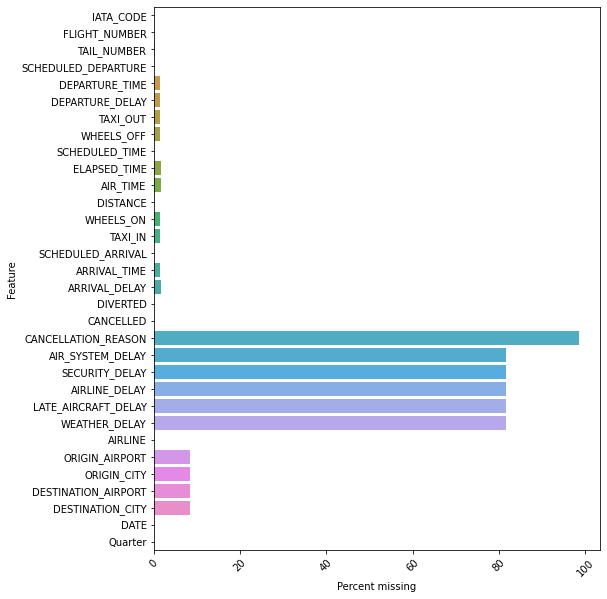

In [14]:
null_vals = flights_df.isnull().sum()/len(flights_df)*100
null_vals = pd.DataFrame(null_vals)
null_vals.reset_index(inplace = True)
null_vals.columns = ["Feature","Percent missing"]
plt.figure(figsize = (8,10))
plt.xticks(rotation=45)
sns.barplot(x = "Percent missing",y ="Feature",data = null_vals,orient = "h")

In [15]:
'''Drop duplicated rows'''

flights_data1 = flights_df.drop_duplicates()
print(flights_data1.shape)
flights_data1.head(2)

(5819079, 32)


,IATA_CODE,FLIGHT_NUMBER,TAIL_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,...,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE,ORIGIN_AIRPORT,ORIGIN_CITY,DESTINATION_AIRPORT,DESTINATION_CITY,DATE,Quarter
0,AS,98,N407AS,5,2354.0,-11.0,21.0,15.0,205.0,194.0,...,NaN,NaN,NaN,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,2015-01-01,2015Q1
1,AA,2336,N3KUAA,10,2.0,-8.0,12.0,14.0,280.0,279.0,...,NaN,NaN,NaN,American Airlines Inc.,Los Angeles International Airport,Los Angeles,Palm Beach International Airport,West Palm Beach,2015-01-01,2015Q1


##### Generating a simplified profiling report on the merged dataset

In [16]:
#replace null values with 'NaN' for all elements

flights_data1['TAIL_NUMBER'] = flights_data1['TAIL_NUMBER'].fillna('NaN')
flights_data1['TAXI_OUT'] = flights_data1['TAXI_OUT'].fillna('NaN')
flights_data1['WHEELS_OFF'] = flights_data1['WHEELS_OFF'].fillna('NaN')
flights_data1['SCHEDULED_TIME'] = flights_data1['SCHEDULED_TIME'].fillna('NaN')
flights_data1['DEPARTURE_TIME'] = flights_data1['DEPARTURE_TIME'].fillna('NaN')
flights_data1['TAXI_OUT'] = flights_data1['TAXI_OUT'].fillna('NaN')
flights_data1['WHEELS_OFF'] = flights_data1['WHEELS_OFF'].fillna('NaN')
flights_data1['AIRLINE_DELAY'] = flights_data1['AIRLINE_DELAY'].fillna('NaN')
flights_data1['AIR_SYSTEM_DELAY'] = flights_data1['AIR_SYSTEM_DELAY'].fillna('NaN')
flights_data1['SECURITY_DELAY'] = flights_data1['SECURITY_DELAY'].fillna('NaN')
flights_data1['LATE_AIRCRAFT_DELAY'] = flights_data1['LATE_AIRCRAFT_DELAY'].fillna('NaN')
flights_data1['WEATHER_DELAY'] = flights_data1['WEATHER_DELAY'].fillna('NaN')
flights_data1['ELAPSED_TIME'] = flights_data1['ELAPSED_TIME'].fillna('NaN')
flights_data1['WHEELS_ON'] = flights_data1['WHEELS_ON'].fillna('NaN')
flights_data1['TAXI_IN'] = flights_data1['TAXI_IN'].fillna('NaN')
flights_data1['ARRIVAL_TIME'] = flights_data1['ARRIVAL_TIME'].fillna('NaN')
flights_data1['DEPARTURE_DELAY'] = flights_data1['DEPARTURE_DELAY'].fillna('NaN')
flights_data1['AIR_TIME'] = flights_data1['AIR_TIME'].fillna('NaN')
flights_data1['CANCELLATION_REASON'].fillna('Unknown', inplace=True)

In [17]:
flights_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5819079 entries, 0 to 5819078
Data columns (total 32 columns):
 #   Column               Dtype         
---  ------               -----         
 0   IATA_CODE            object        
 1   FLIGHT_NUMBER        int64         
 2   TAIL_NUMBER          object        
 3   SCHEDULED_DEPARTURE  int64         
 4   DEPARTURE_TIME       object        
 5   DEPARTURE_DELAY      object        
 6   TAXI_OUT             object        
 7   WHEELS_OFF           object        
 8   SCHEDULED_TIME       object        
 9   ELAPSED_TIME         object        
 10  AIR_TIME             object        
 11  DISTANCE             int64         
 12  WHEELS_ON            object        
 13  TAXI_IN              object        
 14  SCHEDULED_ARRIVAL    int64         
 15  ARRIVAL_TIME         object        
 16  ARRIVAL_DELAY        float64       
 17  DIVERTED             int64         
 18  CANCELLED            int64         
 19  CANCELLATION_REASON  

##### Checking the null values

<AxesSubplot:xlabel='Percent missing', ylabel='Feature'>

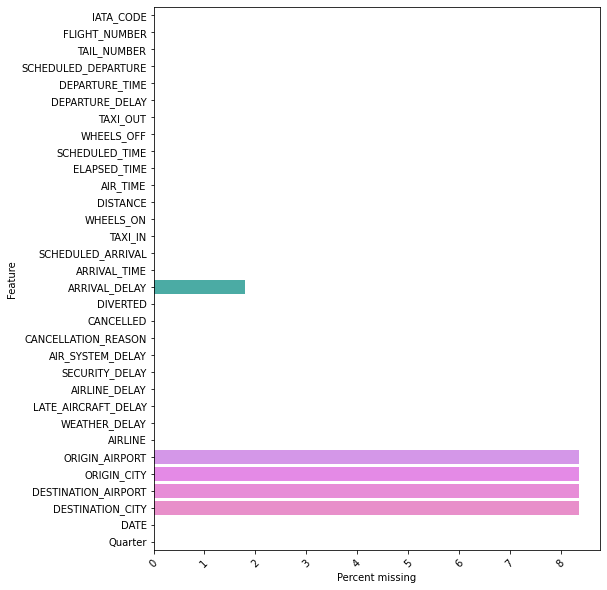

In [18]:
null_vals = flights_data1.isnull().sum()/len(flights_data1)*100
null_vals = pd.DataFrame(null_vals)
null_vals.reset_index(inplace = True)
null_vals.columns = ["Feature","Percent missing"]
plt.figure(figsize = (8,10))
plt.xticks(rotation=45)
sns.barplot(x = "Percent missing",y ="Feature",data = null_vals,orient = "h")

In [19]:
flights_data1.describe()

,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,DIVERTED,CANCELLED
count,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.714008e+06,5.819079e+06,5.819079e+06
mean,2.173093e+03,1.329602e+03,8.223565e+02,1.493808e+03,4.407057e+00,2.609863e-03,1.544643e-02
std,1.757064e+03,4.837518e+02,6.077843e+02,5.071647e+02,3.927130e+01,5.102012e-02,1.233201e-01
min,1.000000e+00,1.000000e+00,2.100000e+01,1.000000e+00,-8.700000e+01,0.000000e+00,0.000000e+00
25%,7.300000e+02,9.170000e+02,3.730000e+02,1.110000e+03,-1.300000e+01,0.000000e+00,0.000000e+00
50%,1.690000e+03,1.325000e+03,6.470000e+02,1.520000e+03,-5.000000e+00,0.000000e+00,0.000000e+00
75%,3.230000e+03,1.730000e+03,1.062000e+03,1.918000e+03,8.000000e+00,0.000000e+00,0.000000e+00
max,9.855000e+03,2.359000e+03,4.983000e+03,2.400000e+03,1.971000e+03,1.000000e+00,1.000000e+00


##### Inserting sequential column named Flight to uniquely identify them

In [20]:
flights_data1.insert(0, 'FLIGHT', range(1, 1 + len(flights_data1)))

##### Replacing cancellation reason column with proper description inplace of cancellation code

In [21]:
flights_data1.loc[flights_data1['CANCELLATION_REASON'] == 'A', 'CANCELLATION_REASON'] = "Airline/Carrier"
flights_data1.loc[flights_data1['CANCELLATION_REASON'] == 'B', 'CANCELLATION_REASON'] = "Weather"
flights_data1.loc[flights_data1['CANCELLATION_REASON'] == 'C', 'CANCELLATION_REASON'] = "National Air System"
flights_data1.loc[flights_data1['CANCELLATION_REASON'] == 'D', 'CANCELLATION_REASON'] = "Security"

##### Creating new columns for categorising flights as per arrival status

In [22]:
flights_data1["ON_TIME"]=flights_data1["ARRIVAL_DELAY"].apply(lambda row:'TRUE' if row==0 else 'FALSE')
flights_data1["ARRIVED_EARLY"]=flights_data1["ARRIVAL_DELAY"].apply(lambda row:'TRUE' if row<0 else 'FALSE')
flights_data1["ARRIVED_LATE"]=flights_data1["ARRIVAL_DELAY"].apply(lambda row:'TRUE' if row>0 else 'FALSE')

##### Creating new columns for categorising delayed flights

In [25]:
def parse_values(row):
    if row == 0:
       return 'FALSE'
    elif row == 'NaN':
       return 'NaN'
    else:
       return 'TRUE'

In [28]:
flights_data1["IS_AIR_SYSTEM_DELAY"] = flights_data1["AIR_SYSTEM_DELAY"].apply(parse_values)
flights_data1["IS_SECURITY_DELAY"] = flights_data1["SECURITY_DELAY"].apply(parse_values)
flights_data1["IS_AIRLINE_DELAY"] = flights_data1["AIRLINE_DELAY"].apply(parse_values)
flights_data1["IS_LATE_AIRCRAFT_DELAY"] = flights_data1["LATE_AIRCRAFT_DELAY"].apply(parse_values)
flights_data1["IS_WEATHER_DELAY"] = flights_data1["WEATHER_DELAY"].apply(parse_values)

##### Extracting the harmonized dataset to excel

In [29]:
flights_data1.nunique()

FLIGHT                    5819079
IATA_CODE                      14
FLIGHT_NUMBER                6952
TAIL_NUMBER                  4898
SCHEDULED_DEPARTURE          1321
DEPARTURE_TIME               1441
DEPARTURE_DELAY              1218
TAXI_OUT                      185
WHEELS_OFF                   1441
SCHEDULED_TIME                551
ELAPSED_TIME                  713
AIR_TIME                      676
DISTANCE                     1363
WHEELS_ON                    1441
TAXI_IN                       186
SCHEDULED_ARRIVAL            1435
ARRIVAL_TIME                 1441
ARRIVAL_DELAY                1240
DIVERTED                        2
CANCELLED                       2
CANCELLATION_REASON             5
AIR_SYSTEM_DELAY              571
SECURITY_DELAY                155
AIRLINE_DELAY                1068
LATE_AIRCRAFT_DELAY           696
WEATHER_DELAY                 633
AIRLINE                        14
ORIGIN_AIRPORT                322
ORIGIN_CITY                   308
DESTINATION_AI

In [30]:
flights_data1.to_csv('wrangled_dataset.csv', index=False)